In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D, BatchNormalization, InputLayer, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import pandas as pd
import seaborn as sns
import time

In [2]:
label_train = np.load("array/label_train.npy")
img_train = np.load("array/img_train.npy")
label_val = np.load("array/label_val.npy")
img_val = np.load("array/img_val.npy")
label_test = np.load("array/label_test.npy")
img_test = np.load("array/img_test.npy")

In [3]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(4388, 20) (1100, 20)
(4388,) (1100,)


In [4]:
label_train = to_categorical(label_train)
label_val = to_categorical(label_val)  
label_test = to_categorical(label_test) 

label_train = np.reshape(label_train, (label_train.shape[0], 6))
img_train = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], 1))
label_val = np.reshape(label_val, (label_val.shape[0], 6))
img_val = np.reshape(img_val, (img_val.shape[0], img_val.shape[1],  1))
label_test = np.reshape(label_test, (label_test.shape[0], 6))
img_test = np.reshape(img_test, (img_test.shape[0], img_test.shape[1],  1))

In [5]:
print(img_train.shape, img_val.shape, img_test.shape)
print(label_train.shape, label_val.shape, label_test.shape)

(4388, 20, 1) (1100, 20, 1) (1372, 20, 1)
(4388, 6) (1100, 6) (1372, 6)


In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(20,1)))

model.add(Conv1D(8, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(16, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(450))
model.add(Activation('relu'))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 18, 8)             32        
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 8)             32        
_________________________________________________________________
activation (Activation)      (None, 18, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 8)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 16)             400       
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 16)             64        
_________________________________________________________________
activation_1 (Activation)    (None, 7, 16)             0

In [7]:
checkpoint = ModelCheckpoint("progress_01.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [8]:
start = time.time()
history = model.fit(img_train,label_train, epochs=200, steps_per_epoch = 5, validation_data=(img_val, label_val),callbacks=[checkpoint])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/200
5/5 [==============================] - 2s 110ms/step - loss: 1.1475 - accuracy: 0.7170 - mae: 0.1902 - val_loss: 1.3953 - val_accuracy: 0.8364 - val_mae: 0.0549

Epoch 00001: val_accuracy improved from -inf to 0.83636, saving model to progress_01.h5
Epoch 2/200
5/5 [==============================] - 0s 24ms/step - loss: 0.7743 - accuracy: 0.8380 - mae: 0.0783 - val_loss: 1.2979 - val_accuracy: 0.8364 - val_mae: 0.0551

Epoch 00002: val_accuracy did not improve from 0.83636
Epoch 3/200
5/5 [==============================] - 0s 28ms/step - loss: 0.6756 - accuracy: 0.8380 - mae: 0.0876 - val_loss: 0.9724 - val_accuracy: 0.8364 - val_mae: 0.0586

Epoch 00003: val_accuracy did not improve from 0.83636
Epoch 4/200
5/5 [==============================] - 0s 30ms/step - loss: 0.6446 - accuracy: 0.8380 - mae: 0.1019 - val_loss: 0.8470 - val_accuracy: 0.8364 - val_mae: 0.0638

Epoch 00004: val_accuracy did not improve from 0.83636
Epoch 5/200
5/5 [==============================] - 0s 


Epoch 00036: val_accuracy did not improve from 0.83909
Epoch 37/200
5/5 [==============================] - 0s 27ms/step - loss: 0.2383 - accuracy: 0.9164 - mae: 0.0442 - val_loss: 0.6757 - val_accuracy: 0.8064 - val_mae: 0.0957

Epoch 00037: val_accuracy did not improve from 0.83909
Epoch 38/200
5/5 [==============================] - 0s 29ms/step - loss: 0.2268 - accuracy: 0.9189 - mae: 0.0432 - val_loss: 0.6198 - val_accuracy: 0.8209 - val_mae: 0.0868

Epoch 00038: val_accuracy did not improve from 0.83909
Epoch 39/200
5/5 [==============================] - 0s 26ms/step - loss: 0.2202 - accuracy: 0.9216 - mae: 0.0417 - val_loss: 0.6568 - val_accuracy: 0.8191 - val_mae: 0.0852

Epoch 00039: val_accuracy did not improve from 0.83909
Epoch 40/200
5/5 [==============================] - 0s 27ms/step - loss: 0.2166 - accuracy: 0.9207 - mae: 0.0417 - val_loss: 0.6212 - val_accuracy: 0.8245 - val_mae: 0.0862

Epoch 00040: val_accuracy did not improve from 0.83909
Epoch 41/200
5/5 [==========

5/5 [==============================] - 0s 27ms/step - loss: 0.1170 - accuracy: 0.9610 - mae: 0.0246 - val_loss: 0.6056 - val_accuracy: 0.8436 - val_mae: 0.0537

Epoch 00072: val_accuracy did not improve from 0.85000
Epoch 73/200
5/5 [==============================] - 0s 27ms/step - loss: 0.1065 - accuracy: 0.9658 - mae: 0.0221 - val_loss: 0.5728 - val_accuracy: 0.8445 - val_mae: 0.0547

Epoch 00073: val_accuracy did not improve from 0.85000
Epoch 74/200
5/5 [==============================] - 0s 28ms/step - loss: 0.1039 - accuracy: 0.9654 - mae: 0.0219 - val_loss: 0.5815 - val_accuracy: 0.8500 - val_mae: 0.0534

Epoch 00074: val_accuracy did not improve from 0.85000
Epoch 75/200
5/5 [==============================] - 0s 29ms/step - loss: 0.1051 - accuracy: 0.9624 - mae: 0.0218 - val_loss: 0.5887 - val_accuracy: 0.8482 - val_mae: 0.0525

Epoch 00075: val_accuracy did not improve from 0.85000
Epoch 76/200
5/5 [==============================] - 0s 30ms/step - loss: 0.1058 - accuracy: 0.965


Epoch 00105: val_accuracy did not improve from 0.89909
Epoch 106/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0544 - accuracy: 0.9847 - mae: 0.0127 - val_loss: 0.4019 - val_accuracy: 0.8918 - val_mae: 0.0370

Epoch 00106: val_accuracy did not improve from 0.89909
Epoch 107/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0510 - accuracy: 0.9850 - mae: 0.0117 - val_loss: 0.3562 - val_accuracy: 0.8982 - val_mae: 0.0358

Epoch 00107: val_accuracy did not improve from 0.89909
Epoch 108/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0496 - accuracy: 0.9854 - mae: 0.0113 - val_loss: 0.3420 - val_accuracy: 0.9000 - val_mae: 0.0351

Epoch 00108: val_accuracy improved from 0.89909 to 0.90000, saving model to progress_01.h5
Epoch 109/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0480 - accuracy: 0.9856 - mae: 0.0115 - val_loss: 0.3831 - val_accuracy: 0.8945 - val_mae: 0.0357

Epoch 00109: val_accuracy did not improve f

5/5 [==============================] - 0s 25ms/step - loss: 0.0333 - accuracy: 0.9893 - mae: 0.0077 - val_loss: 0.3452 - val_accuracy: 0.9218 - val_mae: 0.0298

Epoch 00140: val_accuracy did not improve from 0.92182
Epoch 141/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0303 - accuracy: 0.9904 - mae: 0.0074 - val_loss: 0.3615 - val_accuracy: 0.9145 - val_mae: 0.0306

Epoch 00141: val_accuracy did not improve from 0.92182
Epoch 142/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0307 - accuracy: 0.9909 - mae: 0.0074 - val_loss: 0.3371 - val_accuracy: 0.9273 - val_mae: 0.0292

Epoch 00142: val_accuracy improved from 0.92182 to 0.92727, saving model to progress_01.h5
Epoch 143/200
5/5 [==============================] - 0s 24ms/step - loss: 0.0333 - accuracy: 0.9897 - mae: 0.0075 - val_loss: 0.3653 - val_accuracy: 0.9082 - val_mae: 0.0329

Epoch 00143: val_accuracy did not improve from 0.92727
Epoch 144/200
5/5 [==============================] - 0s 27

5/5 [==============================] - 0s 28ms/step - loss: 0.0223 - accuracy: 0.9929 - mae: 0.0054 - val_loss: 0.3440 - val_accuracy: 0.9273 - val_mae: 0.0269

Epoch 00175: val_accuracy did not improve from 0.93182
Epoch 176/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0296 - accuracy: 0.9900 - mae: 0.0061 - val_loss: 0.3645 - val_accuracy: 0.9264 - val_mae: 0.0278

Epoch 00176: val_accuracy did not improve from 0.93182
Epoch 177/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0266 - accuracy: 0.9920 - mae: 0.0058 - val_loss: 0.3724 - val_accuracy: 0.9155 - val_mae: 0.0291

Epoch 00177: val_accuracy did not improve from 0.93182
Epoch 178/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0251 - accuracy: 0.9927 - mae: 0.0053 - val_loss: 0.3489 - val_accuracy: 0.9255 - val_mae: 0.0280

Epoch 00178: val_accuracy did not improve from 0.93182
Epoch 179/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0251 - accuracy: 0

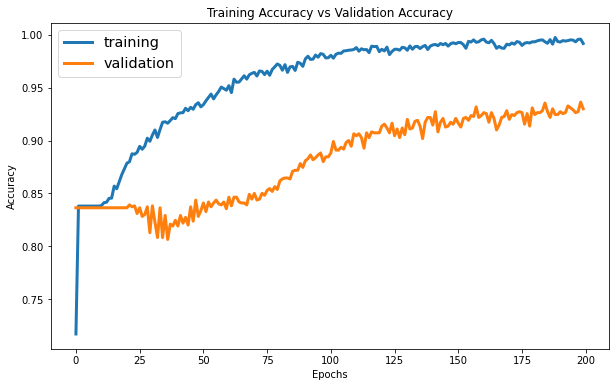

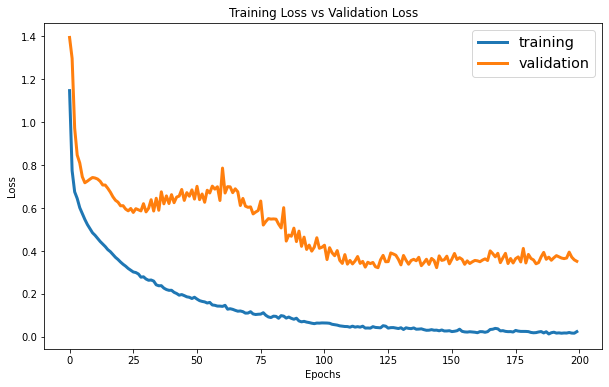

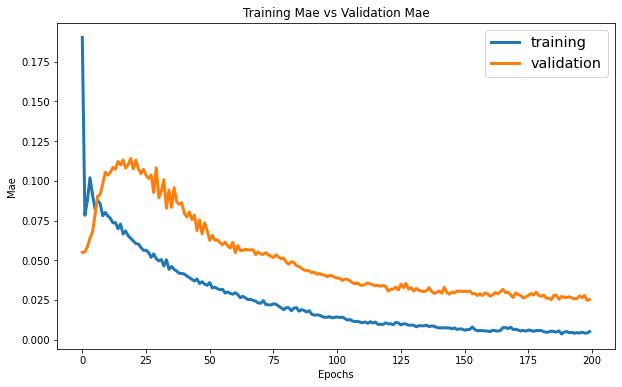

In [9]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', linewidth = 3)
plt.plot(history.history['val_accuracy'], label = 'validation', linewidth = 3)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Accuracy vs Validation Accuracy_Batuk.jpg")

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', linewidth = 3)
plt.plot(history.history['val_loss'], label = 'validation', linewidth = 3)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label = 'training', linewidth = 3)
plt.plot(history.history['val_mae'], label = 'validation', linewidth = 3)
plt.title('Training Mae vs Validation Mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Loss vs Validation Loss_Batuk.jpg")

                precision    recall  f1-score   support

Bronchiectasis       0.10      0.05      0.06        21
 Bronchiolitis       0.05      0.09      0.07        32
          COPD       0.90      0.90      0.90      1149
       Healthy       0.08      0.11      0.09        64
     Pneumonia       0.03      0.02      0.02        57
          URTI       0.10      0.10      0.10        49

      accuracy                           0.76      1372
     macro avg       0.21      0.21      0.21      1372
  weighted avg       0.77      0.76      0.77      1372



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

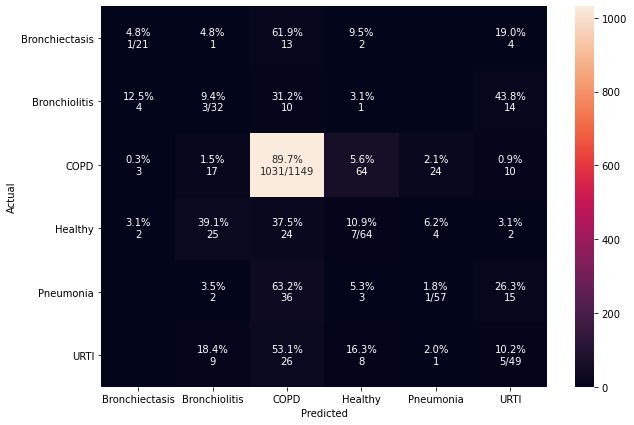

In [10]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']

preds = model.predict(img_test)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")